# Your Very First Machine Learning (ML) Model: Logistic Regression

Dataset: [College Student Placement Factors Dataset](https://www.kaggle.com/datasets/sahilislam007/college-student-placement-factors-dataset) (`data/college_student_placement_dataset.csv`)

In [2]:
# Install missing packages (run once in the notebook)
%pip install --quiet scikit-learn statsmodels seaborn matplotlib

# Import our libraries.

from IPython.display import display

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

Note: you may need to restart the kernel to use updated packages.


## Constants

It is a good programming practice to use constants to avoid repetition errors and to save yourself the effort of retyping the expression by _centralizing_ semantically identical values.

`DATASET_PATH` identifies the path to the dataset being loaded and operated on. `RANDOM_STATE` makes otherwise random operations reproducible run after run. Keep whatever value you set it to unless you want slightly different results.

In [17]:
DATASET_PATH = '/Users/test/ds-fall-2025-tue/Week-07-Classification/data/college_student_placement_dataset.csv'
RANDOM_STATE = 45

## Preliminary Inspection

See what the raw file looks like!

In [18]:
# Look at the first 5 lines of the raw contents of the file first.
# This cell will first check whether DATASET_PATH exists. If it does not,
# it will try to locate the file by filename anywhere in the workspace.
# If the file cannot be found, it will print a helpful message instead of raising.

import os
from pathlib import Path

path_to_open = None

if os.path.exists(DATASET_PATH):
    path_to_open = DATASET_PATH
else:
    # Try to find the file by name anywhere in the workspace
    filename = Path(DATASET_PATH).name
    found = next(Path('.').rglob(filename), None)
    if found:
        print(f"Dataset found at {found}; opening it.")
        path_to_open = str(found)
    else:
        print(f"ERROR: Dataset not found at '{DATASET_PATH}'.")
        print(f"Searched for filename '{filename}' in the workspace and did not find it.")
        print("Please upload the dataset to that path or update DATASET_PATH to the correct location.")
        # Do not attempt to open a non-existent file.

if path_to_open:
    with open(path_to_open, 'r') as file:
        for line_number in range(5):
            line = file.readline()
            if line:
                # print without adding an extra newline (lines already contain '\n')
                print(line, end='')
            else:
                break  # Stop; there are less than 5 lines.


College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
CLG0030,107,6.61,6.28,8,No,8,8,4,No
CLG0061,97,5.52,5.37,8,No,7,8,0,No
CLG0036,109,5.36,5.83,9,No,3,1,1,No
CLG0055,122,5.47,5.75,6,Yes,1,6,1,No


## Preliminary Load

Load the data. This is not the final form of the data which will be used, but it’s a `DataFrame` for further inspection so we can decide what to do with it next.

In [19]:
# Load the dataset into a pandas dataframe.

df = pd.read_csv(DATASET_PATH)

#diaplay the few row 
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


## Null Values Check
Inspect which varibles may be good / not good for using as features based on null values. 


In [20]:
# Identify which columns have null values. 
df.isnull().sum()



College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

## Duplicate Rows Check
If so, remove the duplicates.

In [21]:
# Ensure `df` exists (in case this cell is run before the cell that loads the CSV).
import os
from pathlib import Path

if 'df' not in globals():
	# `pd` and `DATASET_PATH` are defined in other cells; reuse them.
	if os.path.exists(DATASET_PATH):
		df = pd.read_csv(DATASET_PATH)
	else:
		# Try to locate the dataset file anywhere in the workspace by filename.
		filename = Path(DATASET_PATH).name
		found = next(Path('.').rglob(filename), None)
		if found:
			print(f"Dataset found at {found}; loading it.")
			df = pd.read_csv(found)
		else:
			# Graceful fallback: inform the user and create an empty DataFrame to avoid NameError.
			print(f"ERROR: Dataset not found at {DATASET_PATH}.")
			print("Searched for filename '%s' in the workspace and did not find it." % filename)
			print("Please upload the dataset to that path or update DATASET_PATH to the correct location.")
			df = pd.DataFrame()

# Check to see if our data has any duplicate rows.
duplicate_rows = df.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows}')

# Remove duplicate rows and report how many were removed.
rows_before = len(df)
df = df.drop_duplicates()
rows_after = len(df)
print(f'Removed {rows_before - rows_after} duplicate rows.')



Duplicate rows: 0
Removed 0 duplicate rows.


Many clean… 😐

## Categorical Categories

What are the categories for the categorial-looking (i.e., non-numeric) columns?

In [22]:
# Select non-numeric (object or category dtype) columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Display each column and its unique values
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: College_ID
['CLG0030' 'CLG0061' 'CLG0036' 'CLG0055' 'CLG0004' 'CLG0015' 'CLG0071'
 'CLG0096' 'CLG0097' 'CLG0057' 'CLG0063' 'CLG0077' 'CLG0064' 'CLG0017'
 'CLG0053' 'CLG0040' 'CLG0070' 'CLG0050' 'CLG0068' 'CLG0072' 'CLG0034'
 'CLG0087' 'CLG0073' 'CLG0024' 'CLG0008' 'CLG0025' 'CLG0018' 'CLG0014'
 'CLG0006' 'CLG0082' 'CLG0090' 'CLG0075' 'CLG0094' 'CLG0089' 'CLG0016'
 'CLG0076' 'CLG0047' 'CLG0054' 'CLG0058' 'CLG0100' 'CLG0046' 'CLG0001'
 'CLG0041' 'CLG0093' 'CLG0027' 'CLG0062' 'CLG0081' 'CLG0028' 'CLG0020'
 'CLG0051' 'CLG0069' 'CLG0088' 'CLG0038' 'CLG0029' 'CLG0035' 'CLG0019'
 'CLG0005' 'CLG0026' 'CLG0066' 'CLG0045' 'CLG0043' 'CLG0074' 'CLG0048'
 'CLG0012' 'CLG0099' 'CLG0011' 'CLG0091' 'CLG0083' 'CLG0080' 'CLG0044'
 'CLG0059' 'CLG0031' 'CLG0039' 'CLG0065' 'CLG0079' 'CLG0095' 'CLG0085'
 'CLG0033' 'CLG0007' 'CLG0037' 'CLG0032' 'CLG0049' 'CLG0056' 'CLG0084'
 'CLG0067' 'CLG0098' 'CLG0042' 'CLG0021' 'CLG0009' 'CLG0010' 'CLG0078'
 'CLG0013' 'CLG0003' 'CLG0092' 'CLG0086' 'CLG0023' 'CLG00

## Feature Engineering

Non-numeric columns containing `'Yes'` and `'No'` do not work with logistic regression. Binary categories can be converted an integral type (`int`) with a value of 0 or 1.

In [23]:
# Convert 'Yes'/'No' to 1/0
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})
df.head()




,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


❔ When should you use this versus using `pd.get_dummies`?

# Visualization with `sns.pairplot`

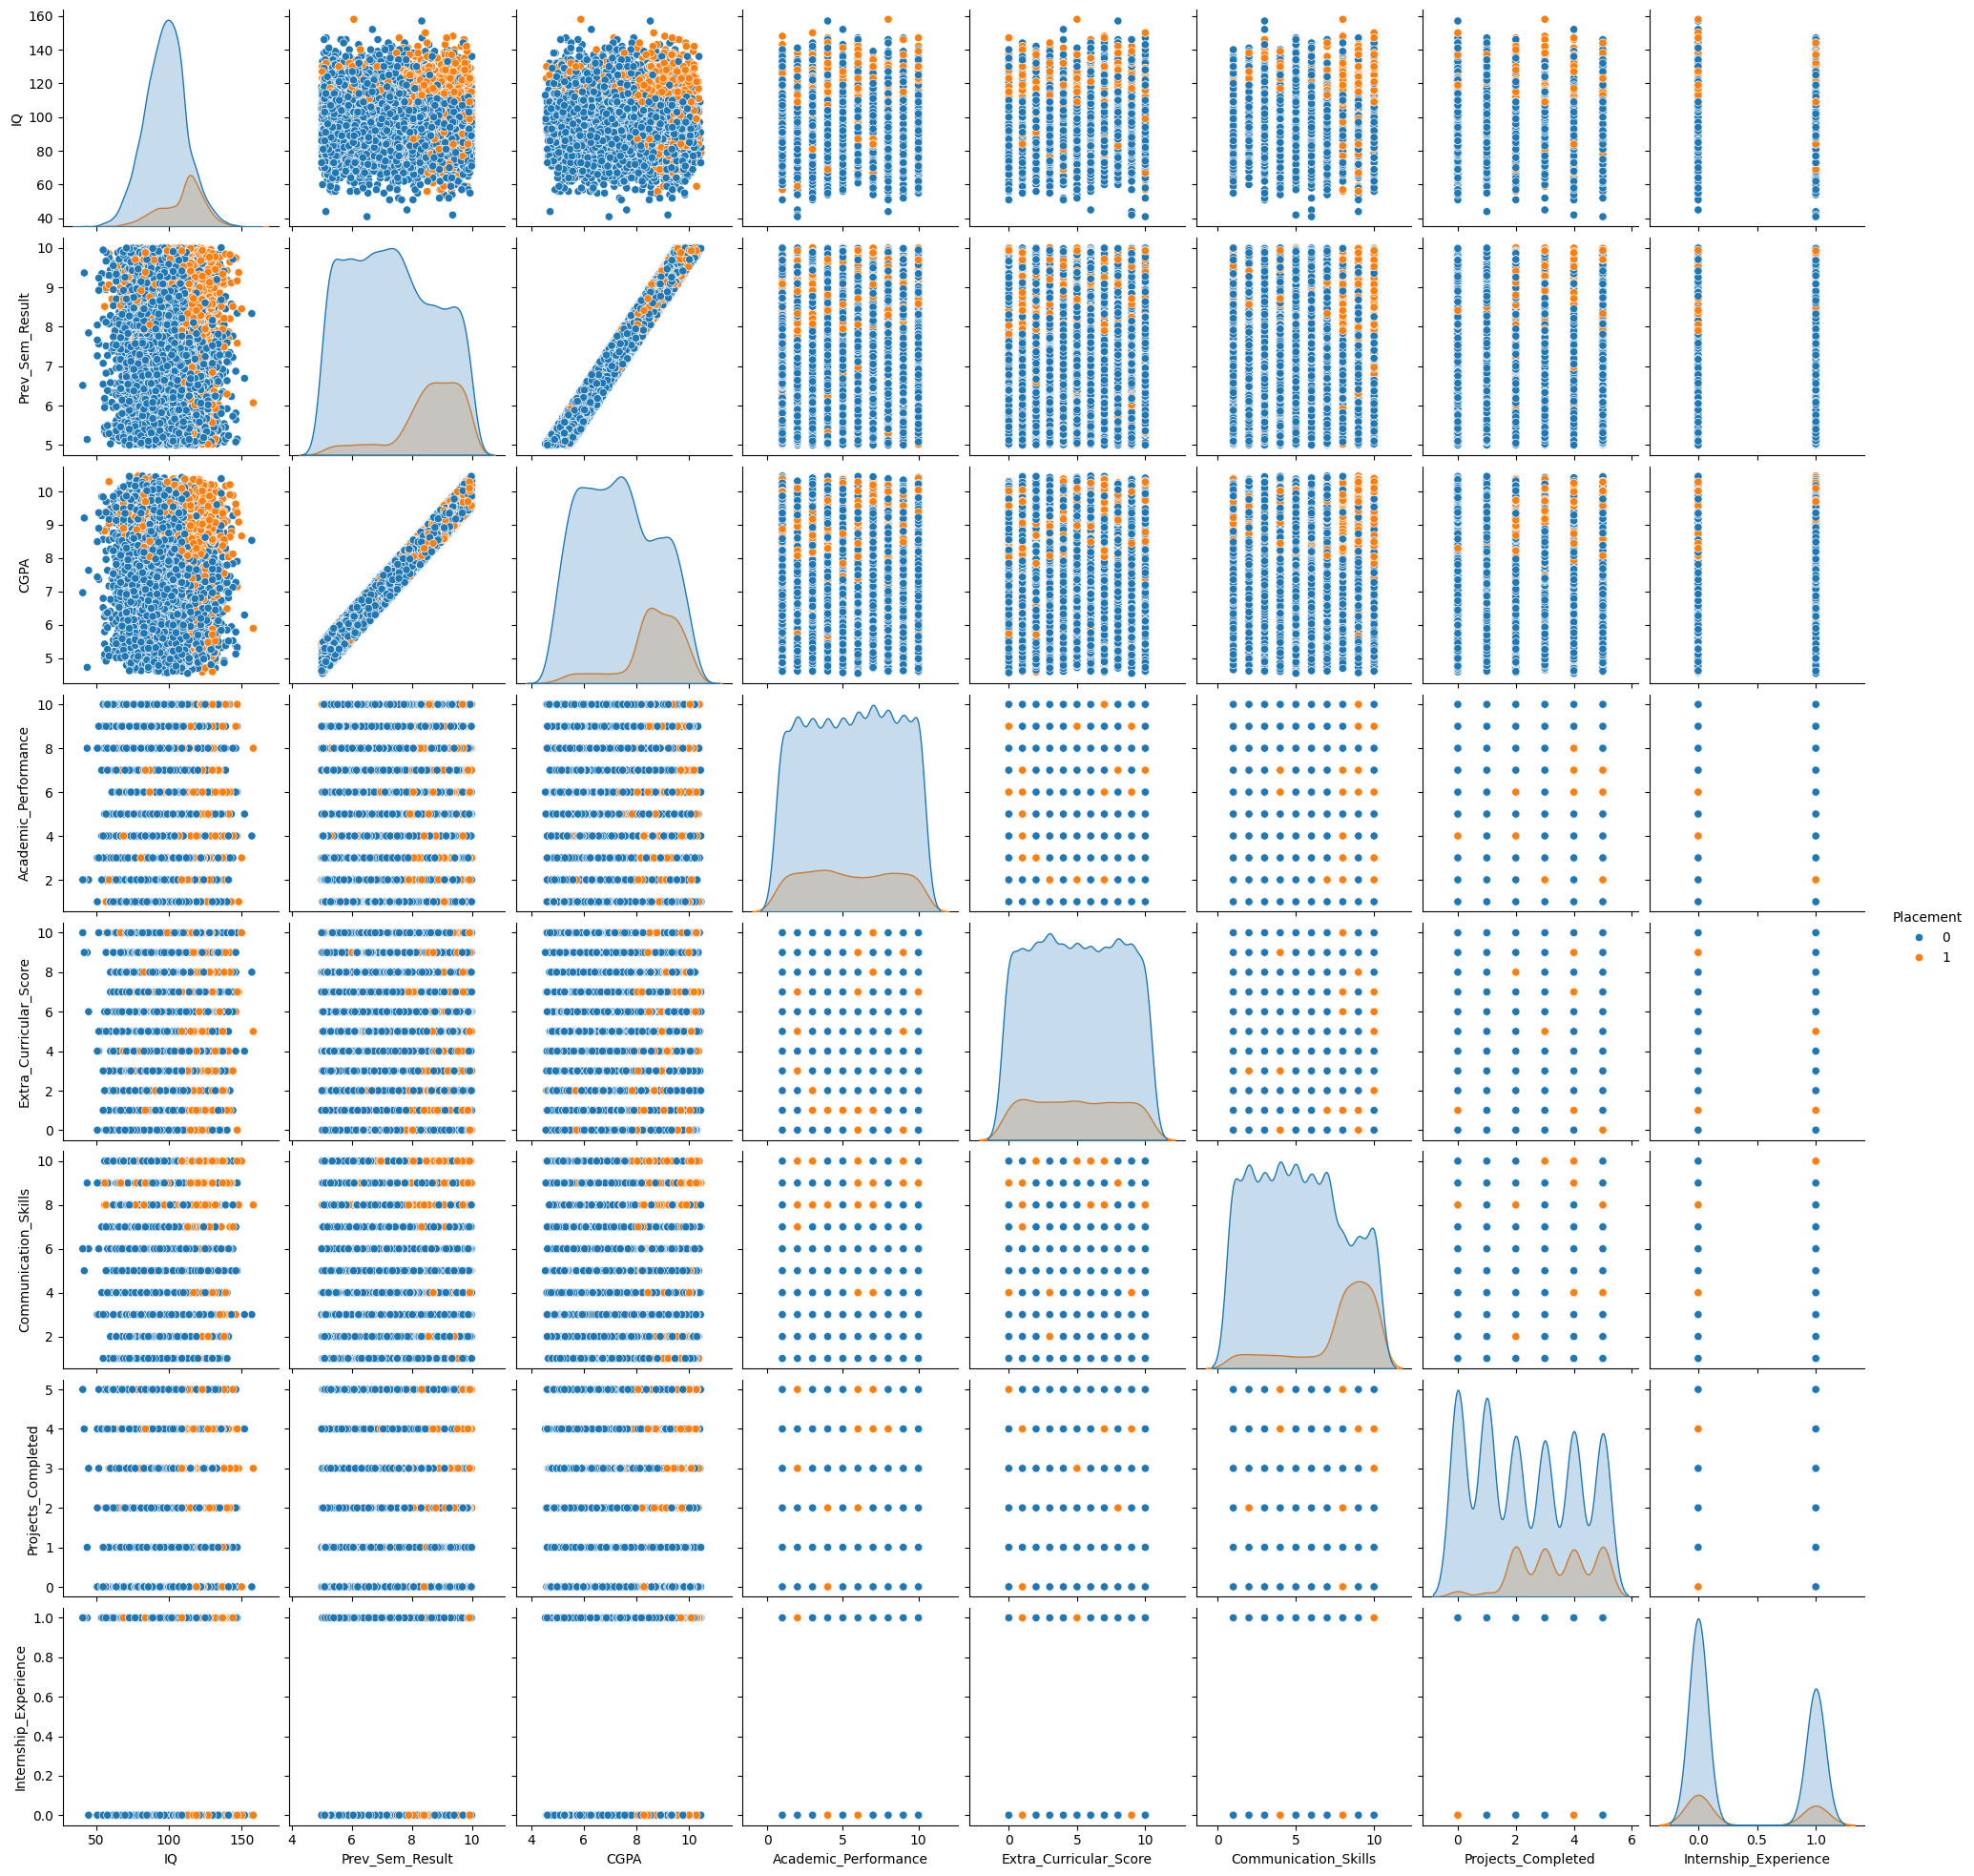

In [24]:
# Use sns.pariplot to visualize.

features = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
            'Extra_Curricular_Score', 'Communication_Skills',
            'Projects_Completed', 'Internship_Experience', 'Placement']

sns.pairplot(df[features], hue='Placement', diag_kind='kde')
plt.show()


## Feature Selection 

Choose the columns corresponding to the features _IQ_ and _internship experience_ to be your `X`. Target _placement_ as your `y`.

In [25]:
# Set X to the desired features.
X=df[['IQ','Internship_Experience']]

# Set y to be our target variable. 
y=df['Placement']

X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Placement, dtype: int64

## Split to Testing and Training Datasets 

In [26]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing (you can adjust test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Print the shapes
print('X_train: %d rows, %d columns' % X_train.shape)
print('X_test: %d rows, %d columns' % X_test.shape)
print('y_train: %d rows, 1 column' % y_train.shape[0])
print('y_test: %d rows, 1 column' % y_test.shape[0])


X_train: 8000 rows, 2 columns
X_test: 2000 rows, 2 columns
y_train: 8000 rows, 1 column
y_test: 2000 rows, 1 column


## Build and train your model

Initialize an empty Logistic Regression model, and then fit your model to your training data. 

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(random_state=45)

# Fit the model to the training data
model.fit(X=X_train, y=y_train)
print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


## Evaluation

Make predictions with your test data and save the predictions as `y_pred`.

In [28]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


Calculate and print the accuracy, precision, recall, and F1 scores of your model.

In [29]:
# 2. Calculate and print the accuracy, precision, recall, and F1 scores of your model.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)


Accuracy Score: 0.841500
Precision Score: 0.550000
Recall Score: 0.034483
F1 Score: 0.064897


Plot a confusion matrix of your predicted results.

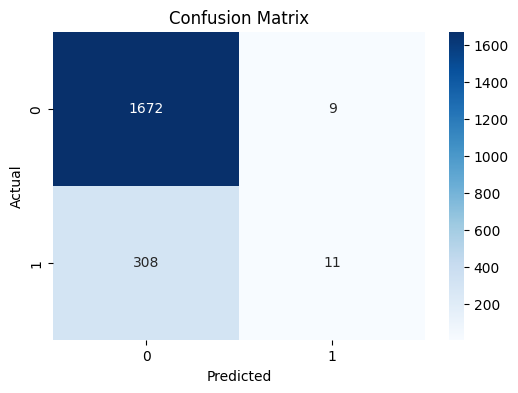

In [30]:
# 3. Plot a confusion matrix of your predicted results.

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

How many true positives and true negatives did your model get?

In [22]:
# How many true positives and true negatives did your model get?

true_negatives, false_positives, false_negatives, true_positives =cm.ravel()
print('True Negatives: %d' % true_negatives)
print('True Positives: %d' % true_positives)

True Negatives: 1651
True Positives: 11


Such awful 😞

# What is the Most Important Feature
 
Use `statsmodel` to create a summary report. Interpret the results.

In [23]:
# Add a constant term to the independent variables.
X_const = sm.add_constant(X)

# Fit the model.
# Fit the model
logit_model = sm.Logit(y, X_const)  # y = target
result = logit_model.fit()


# Print the summary and interpret the results.

odds_ratios = np.exp(result.params)
print(result.summary())
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.406531
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Placement   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Oct 2025   Pseudo R-squ.:                 0.09524
Time:                        22:57:05   Log-Likelihood:                -4065.3
converged:                       True   LL-Null:                       -4493.3
Covariance Type:            nonrobust   LLR p-value:                1.408e-186
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.4077      0.224    -33.142      0.000      -7.846      -6.

# Extra Credit: Use your brain and make a better model (as in better scores).



Accuracy Score: 0.828500
Precision Score: 0.360000
Recall Score: 0.026786
F1 Score: 0.049861


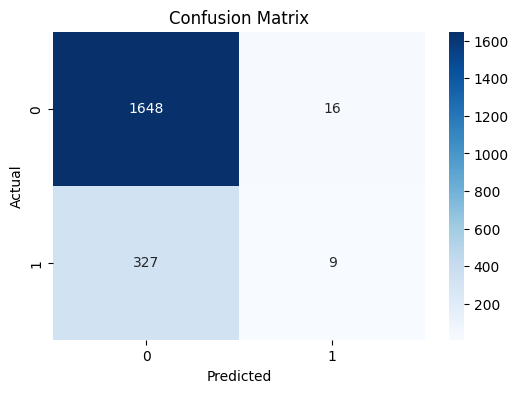

In [31]:
# Define the new X variable, and reuse the same y variable from before.
X = df[['IQ', 'Internship_Experience']] 
y = df['Placement']

# Split our data into testing and training. Remember to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Initalize our model.
model = LogisticRegression()

# Fit-train our model using our training data.
model.fit(X_train, y_train)

# Make new predicitions using our testing data. 
y_pred = model.predict(X_test)

# Print each of our scores to inspect performance.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print("F1 Score: %f" % f1)

# Plot the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()